#Importing Libraries

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cutoff_time = 150

#BC

In [ ]:
cd

/root


In [ ]:
cd ../content/drive/MyDrive/BC\ ET\ Data

/content/drive/MyDrive/BC ET Data


In [ ]:
ls

apoorva_apoorva.csv      Divyank_Divyank.csv    Shyam_Shyam.csv
Ashish_Ashish.csv        Gunjan_Gunjan.csv      Sourabh_Sourabh.csv
Ashishl_ashishl.csv      Hrishike_Hrishike.csv  Sourab_Sourab.csv
Ashishv_ashishv.csv      Jatin_Jatin.csv        Vasudhan_Vasudhan.csv
Ashwin_Ashwin.csv        Manoj_Manoj.csv        Vedant_Vedant.csv
BC.csv                   Mayank_Mayank.csv      VishalP_VishalP.csv
BC_feedback_screens.csv  Paramve_Paramvee.csv   Vishal_Vishal.csv
BC_order_screens.csv     Prerak_Prerak.csv      Yashwant_yashwant.csv
Chinmay_Chinmay.csv      Priyanka_Priyanka.csv
Dishank_Dishank.csv      Saurish_Saurish.csv


In [ ]:
file1 = "apoorva_apoorva.csv"
file2 = "Ashish_Ashish.csv"
file3 = "Ashishl_ashishl.csv"
file4 = "Ashishv_ashishv.csv"
file5 = "Ashwin_Ashwin.csv"
file6 = "Chinmay_Chinmay.csv"
file7 = "Dishank_Dishank.csv"
file8 = "Divyank_Divyank.csv"
file9 = "Gunjan_Gunjan.csv"
file10 = "Hrishike_Hrishike.csv"
file11 = "Jatin_Jatin.csv"
file12 = "Manoj_Manoj.csv"
file13 = "Mayank_Mayank.csv"
file14 = "Paramve_Paramvee.csv"
file15 = "Prerak_Prerak.csv"
file16 = "Priyanka_Priyanka.csv"
file17 = "Saurish_Saurish.csv"
file18 = "Shyam_Shyam.csv"
file19 = "Sourabh_Sourabh.csv"
file20 = "Sourab_Sourab.csv"
file21 = "Vasudhan_Vasudhan.csv"
file22 = "Vedant_Vedant.csv"
file23 = "VishalP_VishalP.csv"
file24 = "Vishal_Vishal.csv"
file25 = "Yashwant_yashwant.csv"

## For Participant 1 (alphabetically)

In [ ]:
df = pd.read_csv(file1)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
trial

array([[1.09936109e-01, 5.03965631e-01, 3.86098260e-01, 9.07800000e+03],
       [3.18936095e-01, 3.87313169e-01, 2.93750736e-01, 8.49700000e+03],
       [0.00000000e+00, 5.46298863e-01, 4.53701137e-01, 7.21400000e+03],
       [1.51149642e-01, 4.87749717e-01, 3.61100641e-01, 5.30600000e+03],
       [0.00000000e+00, 8.28511236e-01, 1.71488764e-01, 7.12000000e+03],
       [0.00000000e+00, 7.62995764e-01, 2.37004236e-01, 5.19400000e+03],
       [0.00000000e+00, 8.15574483e-01, 1.84425517e-01, 5.75300000e+03],
       [6.23883599e-01, 9.75927131e-02, 2.78523688e-01, 1.69070000e+04],
       [7.70877467e-01, 1.94001561e-02, 2.09722377e-01, 8.96900000e+03],
       [5.81869010e-01, 0.00000000e+00, 4.18130990e-01, 5.00800000e+03],
       [7.57274663e-01, 0.00000000e+00, 2.42725337e-01, 4.22700000e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.47200000e+03],
       [2.09539121e-01, 5.38585209e-02, 7.36602358e-01, 3.73200000e+03],
       [5.01138193e-01, 2.58175559e-02, 4.73044251e

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_1 = trial
feedback_1 = feedback

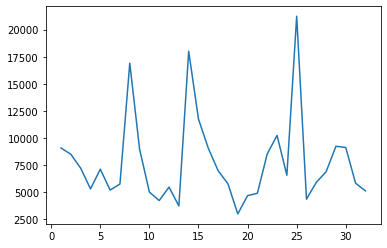

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

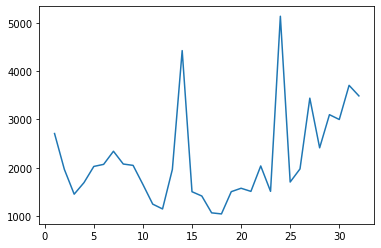

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 2 (alphabetically)

In [ ]:
df = pd.read_csv(file2)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_2 = trial
feedback_2 = feedback

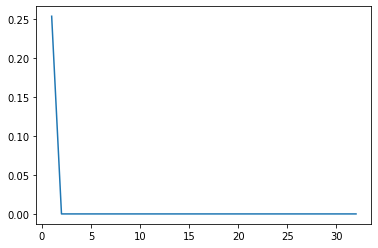

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 2]
plt.plot(x,y) 
plt.show()

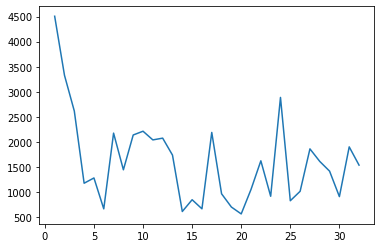

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 3 (alphabetically)

In [ ]:
df = pd.read_csv(file3)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_3 = trial
feedback_3 = feedback

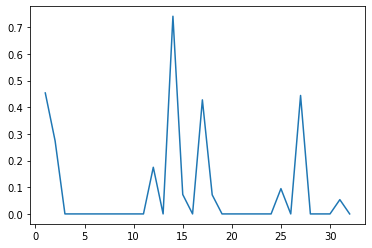

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 2]
plt.plot(x,y) 
plt.show()

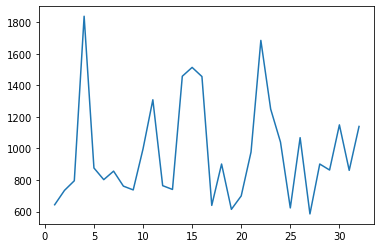

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 4 (alphabetically)

In [ ]:
df = pd.read_csv(file4)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_4 = trial
feedback_4 = feedback

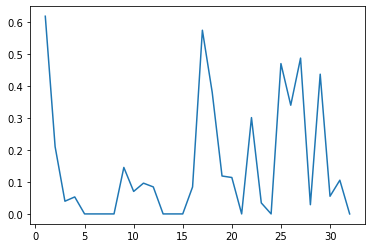

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 2]
plt.plot(x,y) 
plt.show()

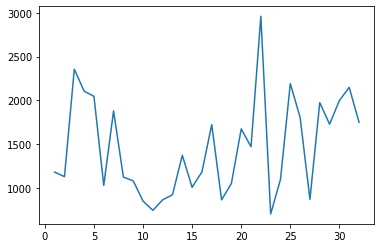

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 5 (alphabetically)

In [ ]:
df = pd.read_csv(file5)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_5 = trial
feedback_5 = feedback

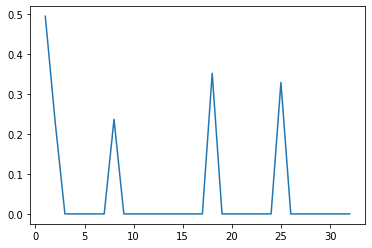

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 2]
plt.plot(x,y) 
plt.show()

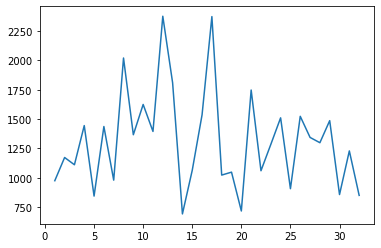

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 6 (alphabetically)

In [ ]:
df = pd.read_csv(file6)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_6 = trial
feedback_6 = feedback

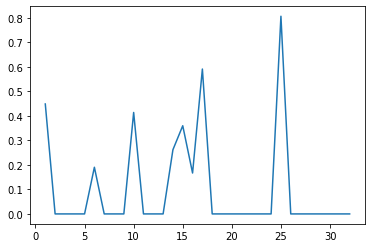

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 2]
plt.plot(x,y) 
plt.show()

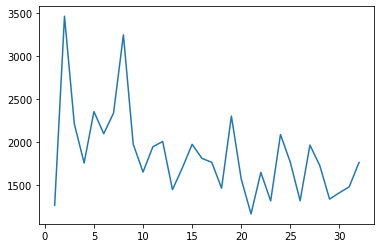

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 7 (alphabetically)

In [ ]:
df = pd.read_csv(file7)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_7 = trial
feedback_7 = feedback

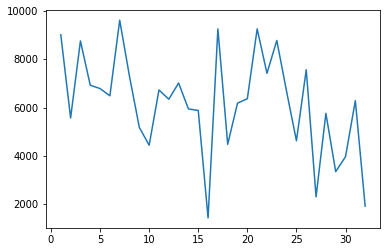

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

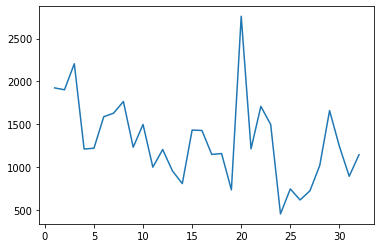

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 8 (alphabetically)

In [ ]:
df = pd.read_csv(file8)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_8 = trial
feedback_8 = feedback

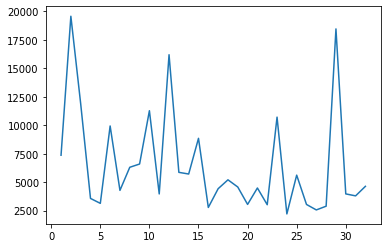

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

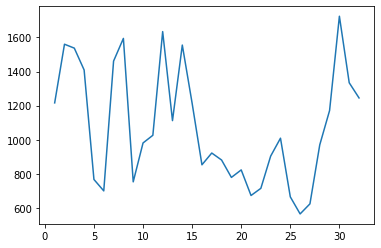

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 9 (alphabetically)

In [ ]:
df = pd.read_csv(file9)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_9 = trial
feedback_9 = feedback

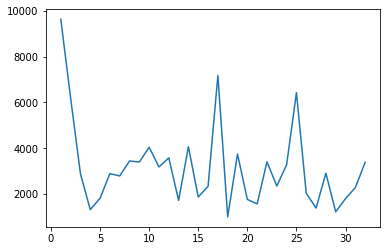

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

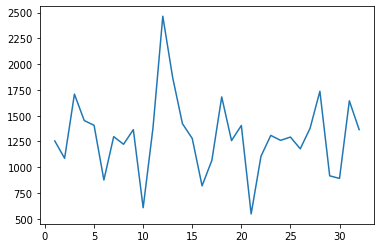

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 10 (alphabetically)

In [ ]:
df = pd.read_csv(file10)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_10 = trial
feedback_10 = feedback

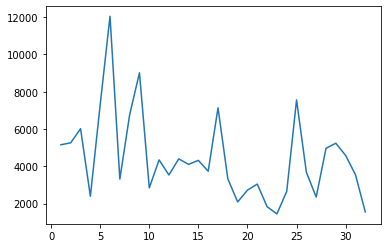

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

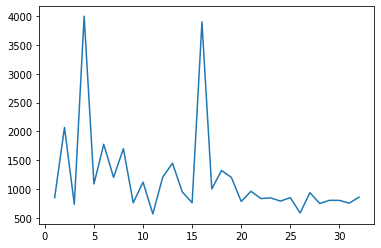

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 11 (alphabetically)

In [ ]:
df = pd.read_csv(file11)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_11 = trial
feedback_11 = feedback

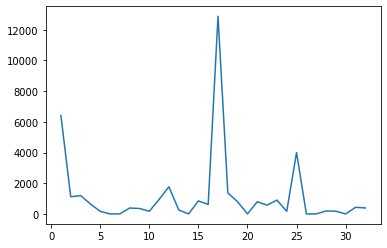

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

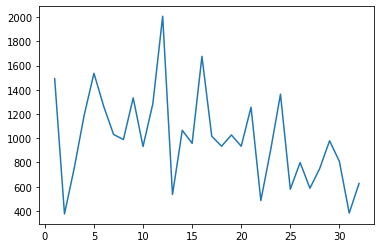

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 12 (alphabetically)

In [ ]:
df = pd.read_csv(file12)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_12 = trial
feedback_12 = feedback

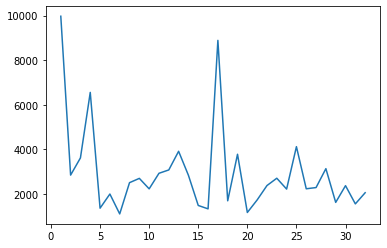

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

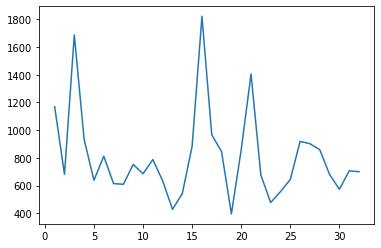

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 13 (alphabetically)

In [ ]:
df = pd.read_csv(file13)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_13 = trial
feedback_13 = feedback

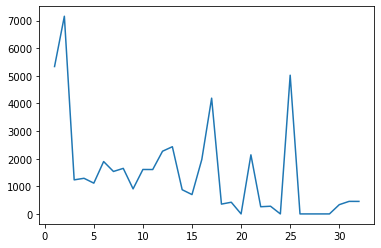

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

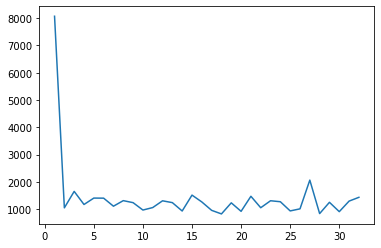

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 14 (alphabetically)

In [ ]:
df = pd.read_csv(file14)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_14 = trial
feedback_14 = feedback

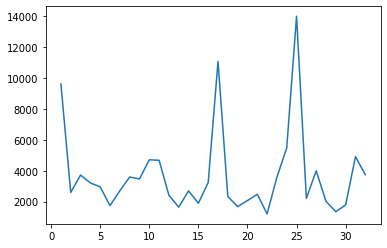

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

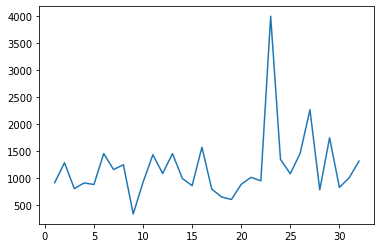

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 15 (alphabetically)

In [ ]:
df = pd.read_csv(file15)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_15 = trial
feedback_15 = feedback

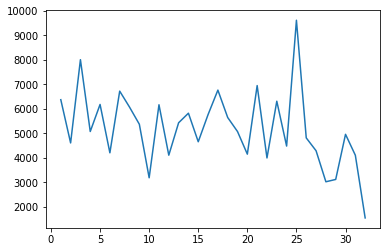

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

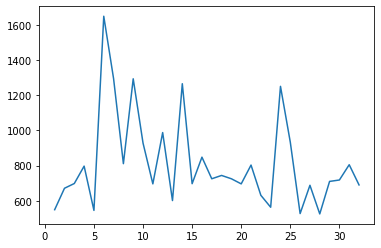

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 16 (alphabetically)

In [ ]:
df = pd.read_csv(file16)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_16 = trial
feedback_16 = feedback

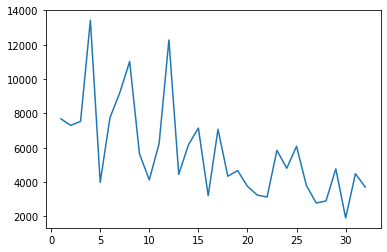

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

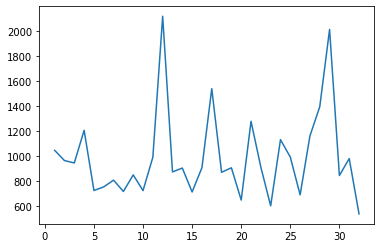

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 17 (alphabetically)

In [ ]:
df = pd.read_csv(file17)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_17 = trial
feedback_17 = feedback

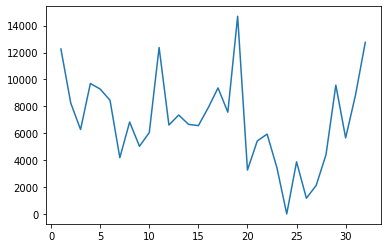

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

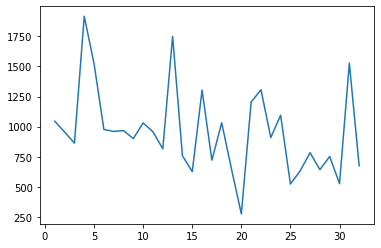

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 18 (alphabetically)

In [ ]:
df = pd.read_csv(file18)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_18 = trial
feedback_18 = feedback

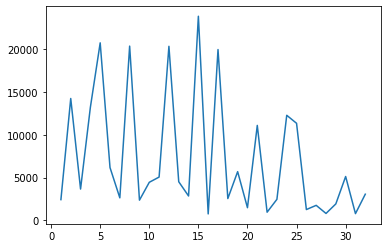

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

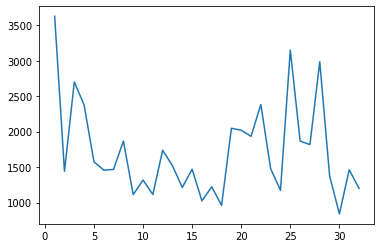

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 19 (alphabetically)

In [ ]:
df = pd.read_csv(file19)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_19 = trial
feedback_19 = feedback

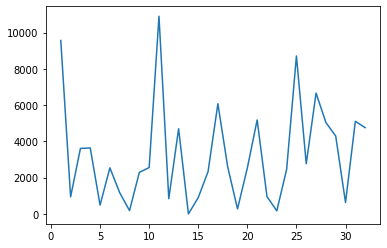

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

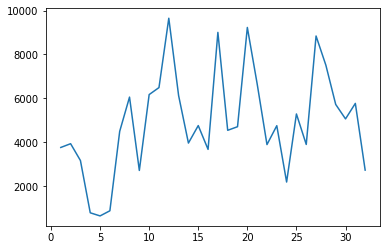

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 20 (alphabetically)

In [ ]:
df = pd.read_csv(file20)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_20 = trial
feedback_20 = feedback

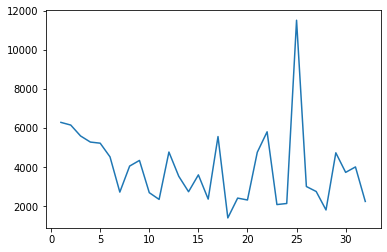

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

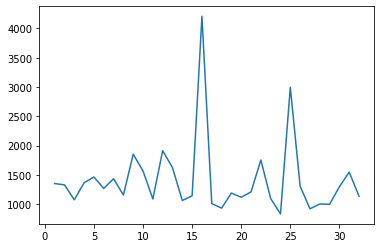

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 21 (alphabetically)

In [ ]:
df = pd.read_csv(file21)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_21 = trial
feedback_21 = feedback

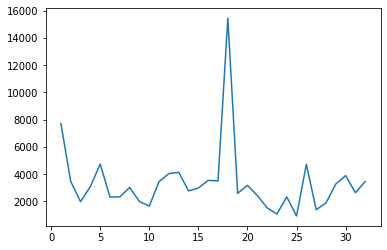

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

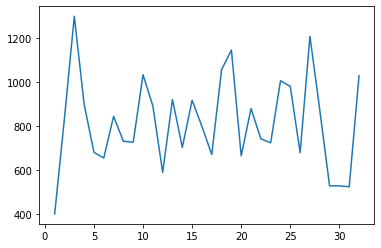

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 22 (alphabetically)

In [ ]:
df = pd.read_csv(file22)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_22 = trial
feedback_22 = feedback

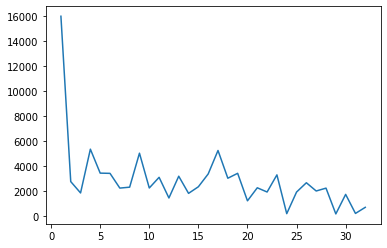

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

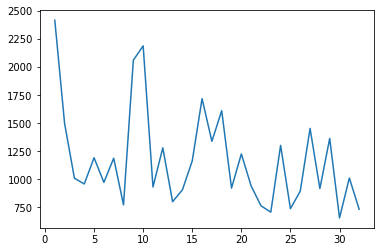

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 23 (alphabetically)

In [ ]:
df = pd.read_csv(file23)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_23 = trial
feedback_23 = feedback

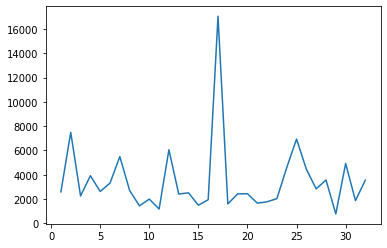

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

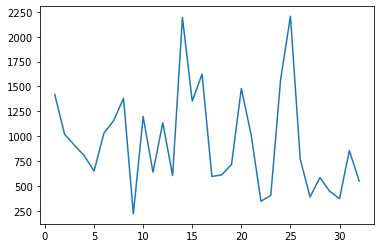

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 24 (alphabetically)

In [ ]:
df = pd.read_csv(file24)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_24 = trial
feedback_24 = feedback

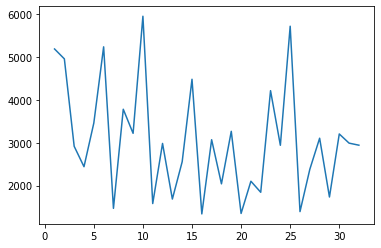

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

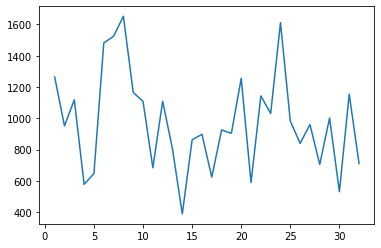

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 25 (alphabetically)

In [ ]:
df = pd.read_csv(file25)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_25 = trial
feedback_25 = feedback

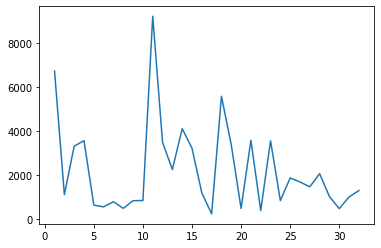

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

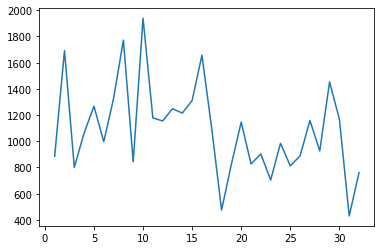

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

##Average of all participants

In [ ]:
trial_average = np.zeros((32,4))
feedback_average = np.zeros((32,1))
trial_sd = np.zeros((32,4))
feedback_sd = np.zeros((32,1))
trial_ci_upper = np.zeros((32,4))
feedback_ci_upper = np.zeros((32,1))
trial_ci_lower = np.zeros((32,4))
feedback_ci_lower = np.zeros((32,1))

In [ ]:
i = 1
j = 0
for i in range(32):
    for j in range(4):
        trial_average[i][j] = trial_1[i][j] +trial_2[i][j] +trial_3[i][j] +trial_4[i][j] +trial_5[i][j] +trial_6[i][j] +trial_7[i][j] +trial_8[i][j] +trial_9[i][j] +trial_10[i][j] +trial_11[i][j] +trial_12[i][j] +trial_13[i][j] +trial_14[i][j] +trial_15[i][j] +trial_16[i][j] +trial_17[i][j] +trial_18[i][j] +trial_19[i][j] +trial_20[i][j] +trial_21[i][j] +trial_22[i][j] +trial_23[i][j] +trial_24[i][j]+ trial_25[i][j]
        trial_average[i][j] = trial_average[i][j]/25
        trial_sd[i][j] = math.sqrt(((trial_1[i][j] - trial_average[i][j])**2 + (trial_2[i][j] - trial_average[i][j])**2 + (trial_3[i][j] - trial_average[i][j])**2 + (trial_4[i][j] - trial_average[i][j])**2 + (trial_5[i][j] - trial_average[i][j])**2 + (trial_6[i][j] - trial_average[i][j])**2 + (trial_7[i][j] - trial_average[i][j])**2 + (trial_8[i][j] - trial_average[i][j])**2 + (trial_9[i][j] - trial_average[i][j])**2 + (trial_10[i][j] - trial_average[i][j])**2 + (trial_11[i][j] - trial_average[i][j])**2 + (trial_12[i][j] - trial_average[i][j])**2 + (trial_13[i][j] - trial_average[i][j])**2 + (trial_14[i][j] - trial_average[i][j])**2 + (trial_15[i][j] - trial_average[i][j])**2 + (trial_16[i][j] - trial_average[i][j])**2 + (trial_17[i][j] - trial_average[i][j])**2 + (trial_18[i][j] - trial_average[i][j])**2 + (trial_19[i][j] - trial_average[i][j])**2 + (trial_20[i][j] - trial_average[i][j])**2 + (trial_21[i][j] - trial_average[i][j])**2 + (trial_22[i][j] - trial_average[i][j])**2 + (trial_23[i][j] - trial_average[i][j])**2 + (trial_24[i][j] - trial_average[i][j])**2 + (trial_25[i][j] - trial_average[i][j])**2)/25)
        trial_ci_upper[i][j] = trial_average[i][j] +  2.064*trial_sd[i][j]/5
        trial_ci_lower[i][j] = trial_average[i][j] -  2.064*trial_sd[i][j]/5

In [ ]:
i = 0
j = 0
for i in range(32):
    feedback_average[i][j] = feedback_1[i][j] +feedback_2[i][j] +feedback_3[i][j] +feedback_4[i][j] +feedback_5[i][j] +feedback_6[i][j] +feedback_7[i][j] +feedback_8[i][j] +feedback_9[i][j] +feedback_10[i][j] +feedback_11[i][j] +feedback_12[i][j] +feedback_13[i][j] +feedback_14[i][j] +feedback_15[i][j] +feedback_16[i][j] +feedback_17[i][j] +feedback_18[i][j] +feedback_19[i][j] +feedback_20[i][j] +feedback_21[i][j] +feedback_22[i][j] +feedback_23[i][j] +feedback_24[i][j]+ feedback_25[i][j]
    feedback_average[i][j] = feedback_average[i][j]/25
    feedback_sd[i][j] = math.sqrt(((feedback_1[i][j] - feedback_average[i][j])**2 + (feedback_2[i][j] - feedback_average[i][j])**2 + (feedback_3[i][j] - feedback_average[i][j])**2 + (feedback_4[i][j] - feedback_average[i][j])**2 + (feedback_5[i][j] - feedback_average[i][j])**2 + (feedback_6[i][j] - feedback_average[i][j])**2 + (feedback_7[i][j] - feedback_average[i][j])**2 + (feedback_8[i][j] - feedback_average[i][j])**2 + (feedback_9[i][j] - feedback_average[i][j])**2 + (feedback_10[i][j] - feedback_average[i][j])**2 + (feedback_11[i][j] - feedback_average[i][j])**2 + (feedback_12[i][j] - feedback_average[i][j])**2 + (feedback_13[i][j] - feedback_average[i][j])**2 + (feedback_14[i][j] - feedback_average[i][j])**2 + (feedback_15[i][j] - feedback_average[i][j])**2 + (feedback_16[i][j] - feedback_average[i][j])**2 + (feedback_17[i][j] - feedback_average[i][j])**2 + (feedback_18[i][j] - feedback_average[i][j])**2 + (feedback_19[i][j] - feedback_average[i][j])**2 + (feedback_20[i][j] - feedback_average[i][j])**2 + (feedback_21[i][j] - feedback_average[i][j])**2 + (feedback_22[i][j] - feedback_average[i][j])**2 + (feedback_23[i][j] - feedback_average[i][j])**2 + (feedback_24[i][j] - feedback_average[i][j])**2 + (feedback_25[i][j] - feedback_average[i][j])**2)/25)
    feedback_ci_upper[i][j] = feedback_average[i][j] +  2.064*feedback_sd[i][j]/5
    feedback_ci_lower[i][j] = feedback_average[i][j] -  2.064*feedback_sd[i][j]/5

In [ ]:
trial_average_BC = trial_average
feedback_average_BC = feedback_average
trial_sd_BC = trial_sd
feedback_sd_BC = feedback_sd
trial_ci_upper_BC = trial_ci_upper
feedback_ci_upper_BC = feedback_ci_upper
trial_ci_lower_BC = trial_ci_lower
feedback_ci_lower_BC = feedback_ci_lower

##Saving output to excel

In [ ]:
xyz = np.ones((32,1))*1
trial_1 = np.append(xyz, trial_1, axis = 1)
xyz = np.ones((32,1))*2
trial_2 = np.append(xyz, trial_2, axis = 1)
xyz = np.ones((32,1))*3
trial_3 = np.append(xyz, trial_3, axis = 1)
xyz = np.ones((32,1))*4
trial_4 = np.append(xyz, trial_4, axis = 1)
xyz = np.ones((32,1))*5
trial_5 = np.append(xyz, trial_5, axis = 1)
xyz = np.ones((32,1))*6
trial_6 = np.append(xyz, trial_6, axis = 1)
xyz = np.ones((32,1))*7
trial_7 = np.append(xyz, trial_7, axis = 1)
xyz = np.ones((32,1))*8
trial_8 = np.append(xyz, trial_8, axis = 1)
xyz = np.ones((32,1))*9
trial_9 = np.append(xyz, trial_9, axis = 1)
xyz = np.ones((32,1))*10
trial_10 = np.append(xyz, trial_10, axis = 1)
xyz = np.ones((32,1))*11
trial_11 = np.append(xyz, trial_11, axis = 1)
xyz = np.ones((32,1))*12
trial_12 = np.append(xyz, trial_12, axis = 1)
xyz = np.ones((32,1))*13
trial_13 = np.append(xyz, trial_13, axis = 1)
xyz = np.ones((32,1))*14
trial_14 = np.append(xyz, trial_14, axis = 1)
xyz = np.ones((32,1))*15
trial_15 = np.append(xyz, trial_15, axis = 1)
xyz = np.ones((32,1))*16
trial_16 = np.append(xyz, trial_16, axis = 1)
xyz = np.ones((32,1))*17
trial_17 = np.append(xyz, trial_17, axis = 1)
xyz = np.ones((32,1))*18
trial_18 = np.append(xyz, trial_18, axis = 1)
xyz = np.ones((32,1))*19
trial_19 = np.append(xyz, trial_19, axis = 1)
xyz = np.ones((32,1))*20
trial_20 = np.append(xyz, trial_20, axis = 1)
xyz = np.ones((32,1))*21
trial_21 = np.append(xyz, trial_21, axis = 1)
xyz = np.ones((32,1))*22
trial_22 = np.append(xyz, trial_22, axis = 1)
xyz = np.ones((32,1))*23
trial_23 = np.append(xyz, trial_23, axis = 1)
xyz = np.ones((32,1))*24
trial_24 = np.append(xyz, trial_24, axis = 1)
xyz = np.ones((32,1))*25
trial_25 = np.append(xyz, trial_25, axis = 1)

In [ ]:
trial = np.append(trial_1, trial_2, axis = 0)
trial = np.append(trial, trial_3, axis = 0)
trial = np.append(trial, trial_4, axis = 0)
trial = np.append(trial, trial_5, axis = 0)
trial = np.append(trial, trial_6, axis = 0)
trial = np.append(trial, trial_7, axis = 0)
trial = np.append(trial, trial_8, axis = 0)
trial = np.append(trial, trial_9, axis = 0)
trial = np.append(trial, trial_10, axis = 0)
trial = np.append(trial, trial_11, axis = 0)
trial = np.append(trial, trial_12, axis = 0)
trial = np.append(trial, trial_13, axis = 0)
trial = np.append(trial, trial_14, axis = 0)
trial = np.append(trial, trial_15, axis = 0)
trial = np.append(trial, trial_16, axis = 0)
trial = np.append(trial, trial_17, axis = 0)
trial = np.append(trial, trial_18, axis = 0)
trial = np.append(trial, trial_19, axis = 0)
trial = np.append(trial, trial_20, axis = 0)
trial = np.append(trial, trial_21, axis = 0)
trial = np.append(trial, trial_22, axis = 0)
trial = np.append(trial, trial_23, axis = 0)
trial = np.append(trial, trial_24, axis = 0)
trial = np.append(trial, trial_25, axis = 0)
print(trial)

[[1.00000000e+00 1.09936109e-01 5.03965631e-01 3.86098260e-01
  9.07800000e+03]
 [1.00000000e+00 3.18936095e-01 3.87313169e-01 2.93750736e-01
  8.49700000e+03]
 [1.00000000e+00 0.00000000e+00 5.46298863e-01 4.53701137e-01
  7.21400000e+03]
 ...
 [2.50000000e+01 0.00000000e+00 1.00000000e+00 0.00000000e+00
  4.59000000e+02]
 [2.50000000e+01 1.00000000e+00 0.00000000e+00 0.00000000e+00
  9.95000000e+02]
 [2.50000000e+01 1.00000000e+00 0.00000000e+00 0.00000000e+00
  1.28200000e+03]]


In [ ]:
np.savetxt('BC.csv', trial, delimiter=",")

##Average Plots for BC

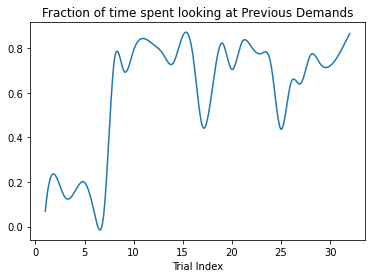

In [ ]:
x = np.arange(1, 33, 1) 
y = trial_average_BC[:, 0]
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_,Y_) 
plt.xlabel('Trial Index')
plt.title('Fraction of time spent looking at Previous Demands')
plt.show()

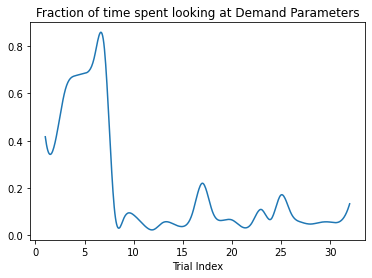

In [ ]:
x = np.arange(1, 33, 1) 
y = trial_average_BC[:, 1]
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_,Y_) 
plt.xlabel('Trial Index')
plt.title('Fraction of time spent looking at Demand Parameters')
plt.show()

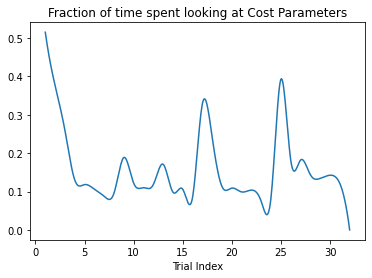

In [ ]:
x = np.arange(1, 33, 1) 
y = trial_average_BC[:, 2]
plt.xlabel('Trial Index')
plt.title('Fraction of time spent looking at Cost Parameters')
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_,Y_) 
plt.show()

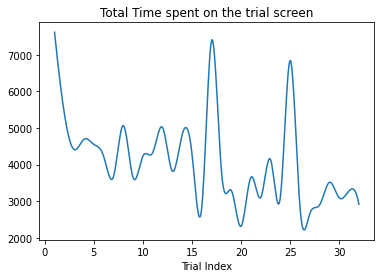

In [ ]:
x = np.arange(1, 33, 1) 
y = trial_average_BC[:, 3]
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_,Y_) 
plt.xlabel('Trial Index')
plt.title('Total Time spent on the trial screen')
plt.show()

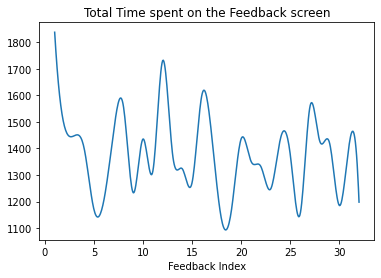

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback_average_BC
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_,Y_) 
plt.xlabel('Feedback Index')
plt.title('Total Time spent on the Feedback screen')
plt.show()

#MP

In [ ]:
cd

/root


In [ ]:
cd ../content/drive/MyDrive/MP ET Data

/content/drive/MyDrive/MP ET Data


In [ ]:
ls

 Apoorva_apoorva.csv       MP_order_screens.csv
 Ashish_Ashish.csv         Paramvee_Paramvee.csv
 Ashishl_ashishl.csv       Prerak_Prerak.csv
 Ashishv_ashishv.csv       Priyanka_Priyanka.csv
 Ashwin_Ashwin.csv         Saurish_Saurish.csv
 Chinmay_chinmay.csv       Shyam_Shyam.csv
 Dishank_Dishank.csv       Sourabh_Sourabh.csv
 Divyank_Divyank.csv       Sourab_Sourab.csv
 Gunjan_Gunjan.csv        'ummair_ummair (No BC Data of this participant).csv'
 Hrishike_Hrishike.csv     Vasudhan_Vasudhan.csv
 Jatin_Jatin.csv           Vedant_Vedant.csv
 Manoj_Manoj.csv           VishalP_VishalP.csv
 Mayank_Mayank.csv         Vishal_Vishal.csv
 MP.csv                    Yashwant_yashwant.csv
 MP_feedback_screens.csv


In [ ]:
file1 = "Apoorva_apoorva.csv"
file2 = "Ashish_Ashish.csv"
file3 = "Ashishl_ashishl.csv"
file4 = "Ashishv_ashishv.csv"
file5 = "Ashwin_Ashwin.csv"
file6 = "Chinmay_chinmay.csv"
file7 = "Dishank_Dishank.csv"
file8 = "Divyank_Divyank.csv"
file9 = "Gunjan_Gunjan.csv"
file10 = "Hrishike_Hrishike.csv"
file11 = "Jatin_Jatin.csv"
file12 = "Manoj_Manoj.csv"
file13 = "Mayank_Mayank.csv"
file14 = "Paramvee_Paramvee.csv"
file15 = "Prerak_Prerak.csv"
file16 = "Priyanka_Priyanka.csv"
file17 = "Saurish_Saurish.csv"
file18 = "Shyam_Shyam.csv"
file19 = "Sourabh_Sourabh.csv"
file20 = "Sourab_Sourab.csv"
file21 = "Vasudhan_Vasudhan.csv"
file22 = "Vedant_Vedant.csv"
file23 = "VishalP_VishalP.csv"
file24 = "Vishal_Vishal.csv"
file25 = "Yashwant_yashwant.csv"

## For Participant 1 (alphabetically)

In [ ]:
df = pd.read_csv(file1)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_1 = trial
feedback_1 = feedback

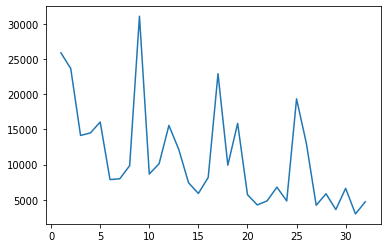

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

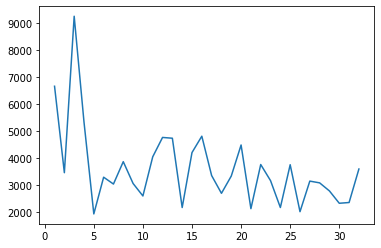

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 2 (alphabetically)

In [ ]:
df = pd.read_csv(file2)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_2 = trial
feedback_2 = feedback

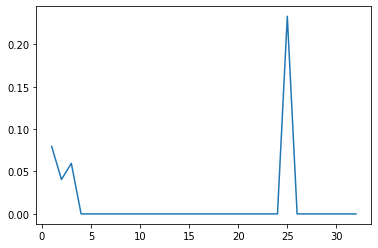

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 2]
plt.plot(x,y) 
plt.show()

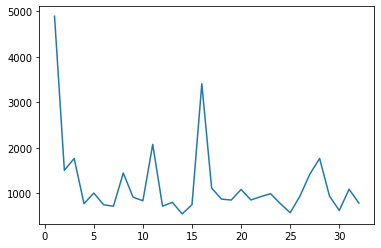

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 3 (alphabetically)

In [ ]:
df = pd.read_csv(file3)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_3 = trial
feedback_3 = feedback

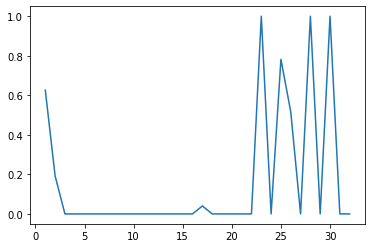

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 2]
plt.plot(x,y) 
plt.show()

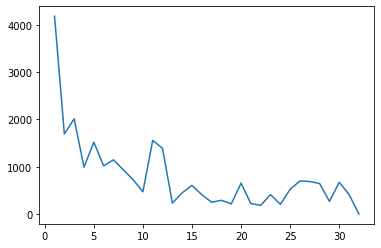

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 4 (alphabetically)

In [ ]:
df = pd.read_csv(file4)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_4 = trial
feedback_4 = feedback

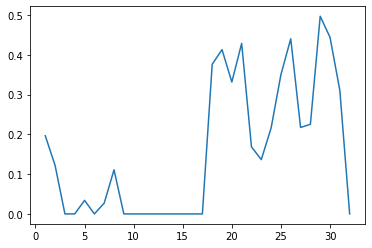

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 2]
plt.plot(x,y) 
plt.show()

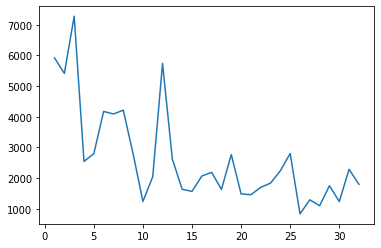

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 5 (alphabetically)

In [ ]:
df = pd.read_csv(file5)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_5 = trial
feedback_5 = feedback

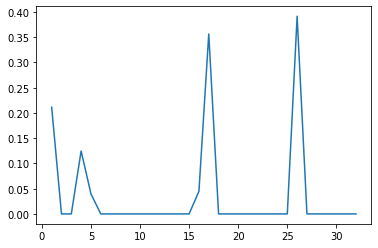

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 2]
plt.plot(x,y) 
plt.show()

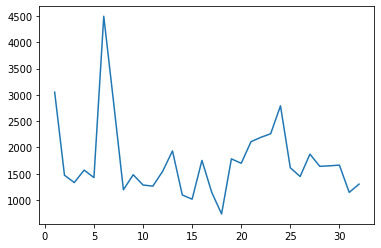

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 6 (alphabetically)

In [ ]:
df = pd.read_csv(file6)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_6 = trial
feedback_6 = feedback

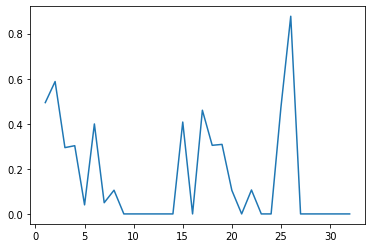

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 2]
plt.plot(x,y) 
plt.show()

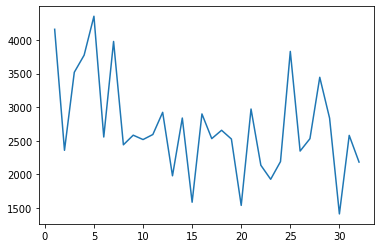

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 7 (alphabetically)

In [ ]:
df = pd.read_csv(file7)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_7 = trial
feedback_7 = feedback

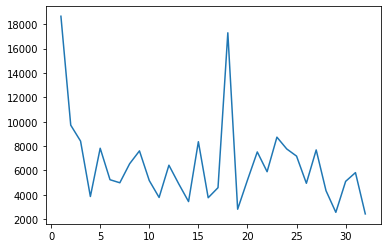

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

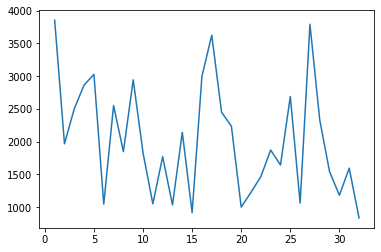

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 8 (alphabetically)

In [ ]:
df = pd.read_csv(file8)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_8 = trial
feedback_8 = feedback

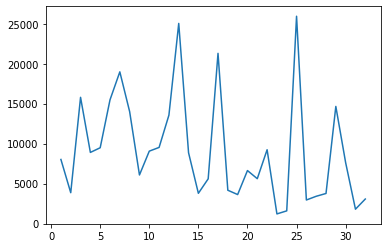

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

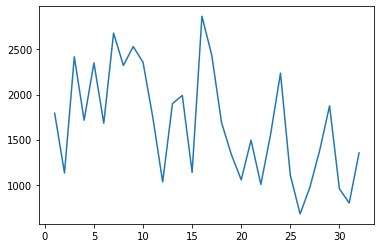

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 9 (alphabetically)

In [ ]:
df = pd.read_csv(file9)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_9 = trial
feedback_9 = feedback

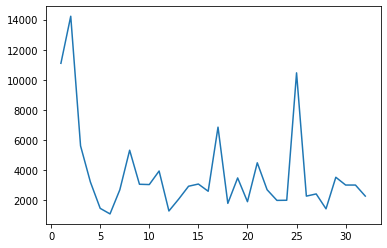

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

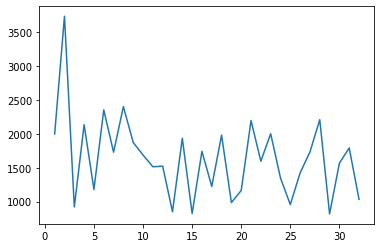

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 10 (alphabetically)

In [ ]:
df = pd.read_csv(file10)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_10 = trial
feedback_10 = feedback

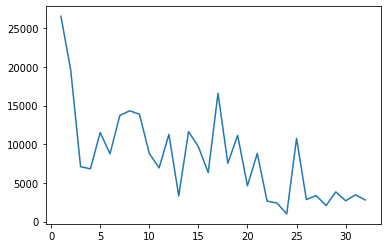

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

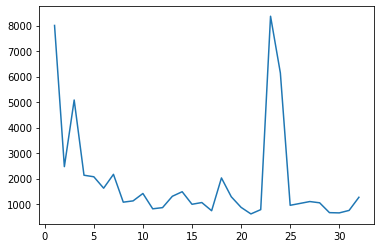

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 11 (alphabetically)

In [ ]:
df = pd.read_csv(file11)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_11 = trial
feedback_11 = feedback

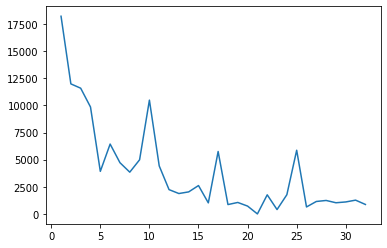

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

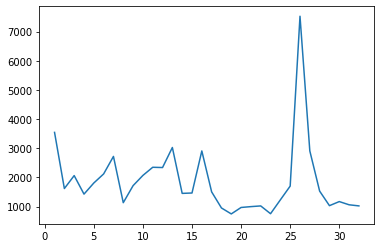

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 12 (alphabetically)

In [ ]:
df = pd.read_csv(file12)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_12 = trial
feedback_12 = feedback

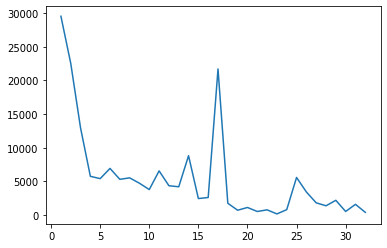

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

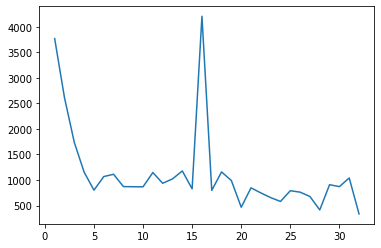

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 13 (alphabetically)

In [ ]:
df = pd.read_csv(file13)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_RUN_ID', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df

,TRIAL_INDEX,CURRENT_FIX_DURATION,CURRENT_FIX_INTEREST_AREA_INDEX
0,1,230,.
1,1,128,3
2,1,160,3
3,1,121,3
4,1,163,1
...,...,...,...
1000,63,271,.
1001,63,298,.
1002,64,448,1
1003,64,424,1


In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_INDEX != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_INDEX'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_13 = trial
feedback_13 = feedback

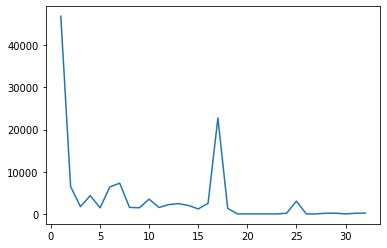

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

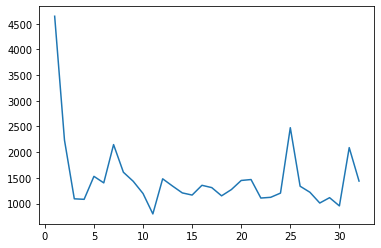

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 14 (alphabetically)

In [ ]:
df = pd.read_csv(file14)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_14 = trial
feedback_14 = feedback

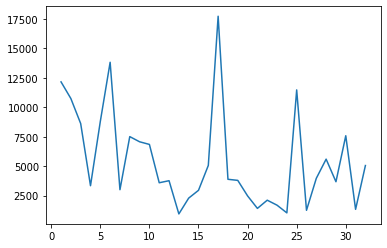

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

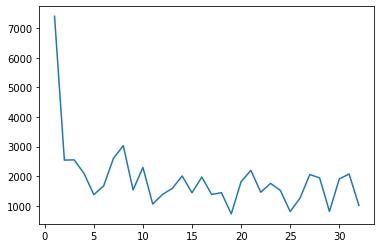

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 15 (alphabetically)

In [ ]:
df = pd.read_csv(file15)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_15 = trial
feedback_15 = feedback

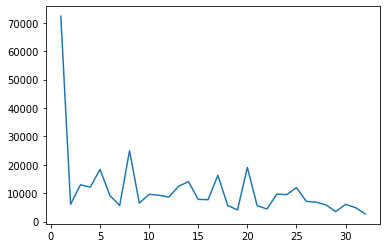

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

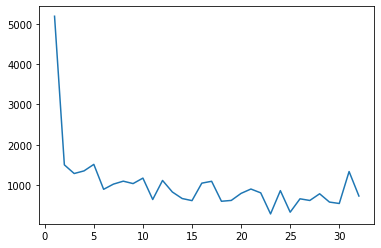

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 16 (alphabetically)

In [ ]:
df = pd.read_csv(file16)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_16 = trial
feedback_16 = feedback

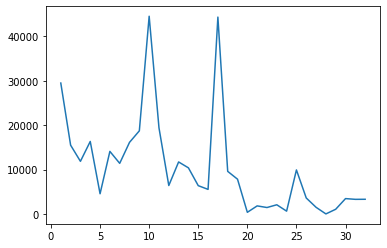

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

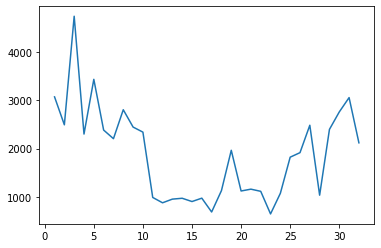

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 17 (alphabetically)

In [ ]:
df = pd.read_csv(file17)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_17 = trial
feedback_17 = feedback

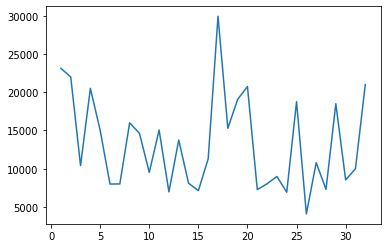

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

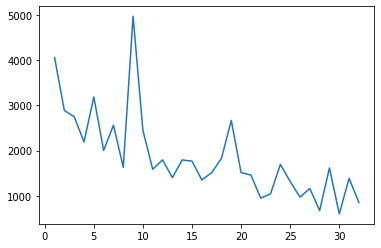

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 18 (alphabetically)

In [ ]:
df = pd.read_csv(file18)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_18 = trial
feedback_18 = feedback

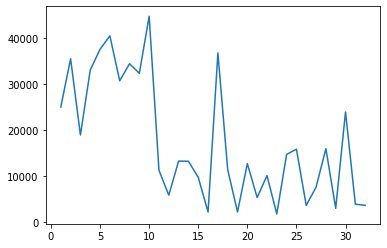

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

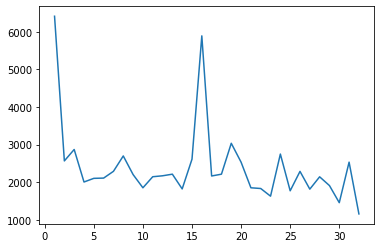

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 19 (alphabetically)

In [ ]:
df = pd.read_csv(file19)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_19 = trial
feedback_19 = feedback

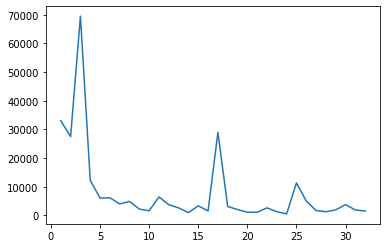

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

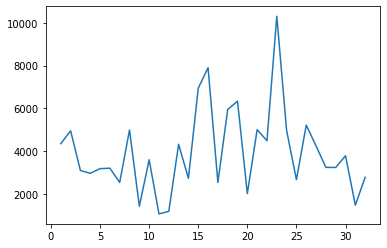

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 20 (alphabetically)

In [ ]:
df = pd.read_csv(file20)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_20 = trial
feedback_20 = feedback

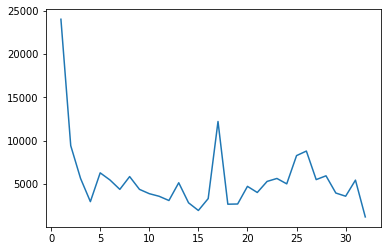

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

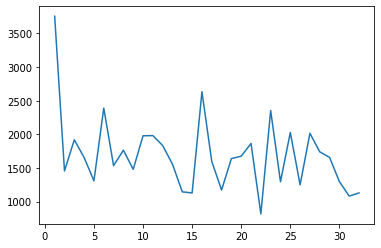

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 21 (alphabetically)

In [ ]:
df = pd.read_csv(file21)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_21 = trial
feedback_21 = feedback

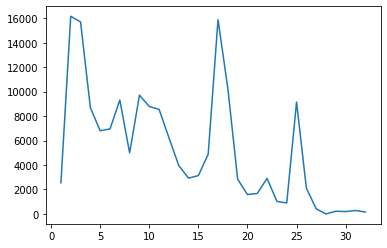

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

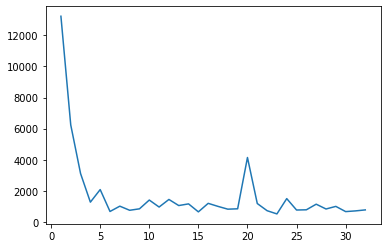

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 22 (alphabetically)

In [ ]:
df = pd.read_csv(file22)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_22 = trial
feedback_22 = feedback

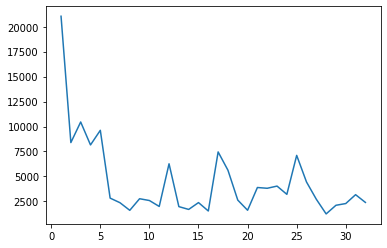

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

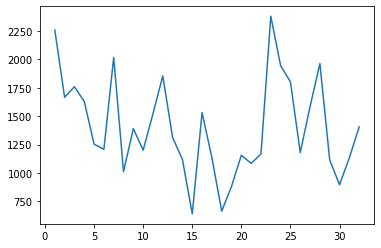

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 23 (alphabetically)

In [ ]:
df = pd.read_csv(file23)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_23 = trial
feedback_23 = feedback

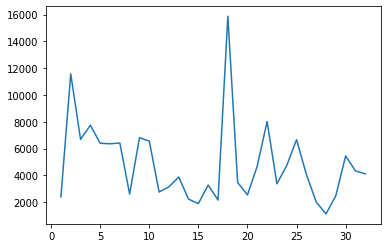

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

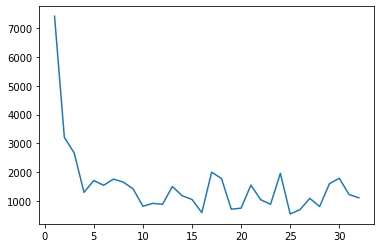

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 24 (alphabetically)

In [ ]:
df = pd.read_csv(file24)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_24 = trial
feedback_24 = feedback

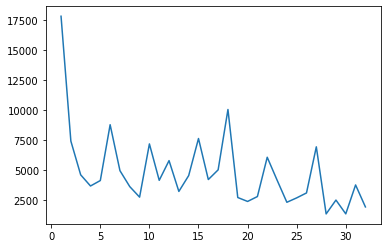

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

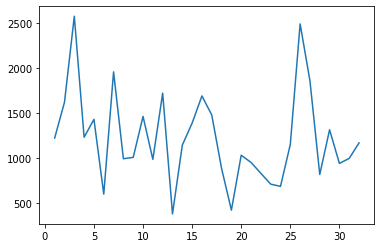

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

## For Participant 25 (alphabetically)

In [ ]:
df = pd.read_csv(file25)

In [ ]:
df.drop(labels={'RECORDING_SESSION_LABEL', 'CURRENT_FIX_END', 'CURRENT_FIX_INTEREST_AREA_INDEX', 'CURRENT_FIX_INTEREST_AREA_LABEL', 'CURRENT_FIX_PUPIL', 'CURRENT_FIX_START', 'CURRENT_FIX_X',
       'CURRENT_FIX_Y', 'IP_INDEX', 'IP_LABEL'}, axis=1, inplace=True)

In [ ]:
df = df[df.CURRENT_FIX_INTEREST_AREA_ID != '.']
df = df[df.CURRENT_FIX_DURATION >= cutoff_time]

In [ ]:
trial = np.zeros((32,4))
feedback = np.zeros((32,1))

In [ ]:
index = 1
row = 0
i = 0
for i in range(32):
    for row in range(3):
        trial[i][row] = df.loc[(df['TRIAL_INDEX'] == index) & (df['CURRENT_FIX_INTEREST_AREA_ID'] == str(row+1)),['CURRENT_FIX_DURATION']].sum(axis=0)
        if np.isnan(trial[i][row]):
            trial[i][row] = 0
    trial[i][3] = trial[i][0] + trial[i][1] + trial[i][2]
    if trial[i][3] != 0:
        trial[i][0] = trial[i][0]/trial[i][3]
        trial[i][1] = trial[i][1]/trial[i][3]
        trial[i][2] = trial[i][2]/trial[i][3]
    index = index + 2

In [ ]:
index = 2
i = 0
for i in range(32):
    feedback[i][0] = df.loc[(df['TRIAL_INDEX'] == index) ,['CURRENT_FIX_DURATION']].sum(axis=0)
    index = index + 2

In [ ]:
trial_25 = trial
feedback_25 = feedback

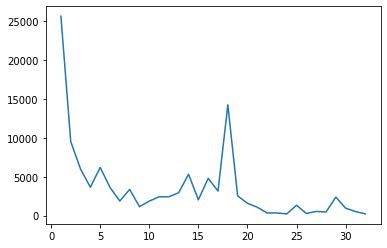

In [ ]:
x = np.arange(1, 33, 1) 
y = trial[:, 3]
plt.plot(x,y) 
plt.show()

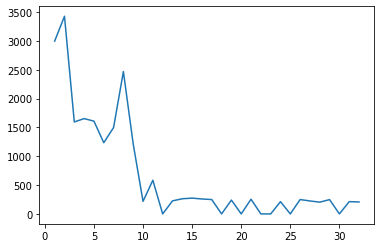

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback
plt.plot(x,y) 
plt.show()

##Average of all participants

In [ ]:
trial_average = np.zeros((32,4))
feedback_average = np.zeros((32,1))
trial_sd = np.zeros((32,4))
feedback_sd = np.zeros((32,1))
trial_ci_upper = np.zeros((32,4))
feedback_ci_upper = np.zeros((32,1))
trial_ci_lower = np.zeros((32,4))
feedback_ci_lower = np.zeros((32,1))

In [ ]:
i = 1
j = 0
for i in range(32):
    for j in range(4):
        trial_average[i][j] = trial_1[i][j] +trial_2[i][j] +trial_3[i][j] +trial_4[i][j] +trial_5[i][j] +trial_6[i][j] +trial_7[i][j] +trial_8[i][j] +trial_9[i][j] +trial_10[i][j] +trial_11[i][j] +trial_12[i][j] +trial_13[i][j] +trial_14[i][j] +trial_15[i][j] +trial_16[i][j] +trial_17[i][j] +trial_18[i][j] +trial_19[i][j] +trial_20[i][j] +trial_21[i][j] +trial_22[i][j] +trial_23[i][j] +trial_24[i][j]+ trial_25[i][j]
        trial_average[i][j] = trial_average[i][j]/25
        trial_sd[i][j] = math.sqrt(((trial_1[i][j] - trial_average[i][j])**2 + (trial_2[i][j] - trial_average[i][j])**2 + (trial_3[i][j] - trial_average[i][j])**2 + (trial_4[i][j] - trial_average[i][j])**2 + (trial_5[i][j] - trial_average[i][j])**2 + (trial_6[i][j] - trial_average[i][j])**2 + (trial_7[i][j] - trial_average[i][j])**2 + (trial_8[i][j] - trial_average[i][j])**2 + (trial_9[i][j] - trial_average[i][j])**2 + (trial_10[i][j] - trial_average[i][j])**2 + (trial_11[i][j] - trial_average[i][j])**2 + (trial_12[i][j] - trial_average[i][j])**2 + (trial_13[i][j] - trial_average[i][j])**2 + (trial_14[i][j] - trial_average[i][j])**2 + (trial_15[i][j] - trial_average[i][j])**2 + (trial_16[i][j] - trial_average[i][j])**2 + (trial_17[i][j] - trial_average[i][j])**2 + (trial_18[i][j] - trial_average[i][j])**2 + (trial_19[i][j] - trial_average[i][j])**2 + (trial_20[i][j] - trial_average[i][j])**2 + (trial_21[i][j] - trial_average[i][j])**2 + (trial_22[i][j] - trial_average[i][j])**2 + (trial_23[i][j] - trial_average[i][j])**2 + (trial_24[i][j] - trial_average[i][j])**2 + (trial_25[i][j] - trial_average[i][j])**2)/25)
        trial_ci_upper[i][j] = trial_average[i][j] +  2.064*trial_sd[i][j]/5
        trial_ci_lower[i][j] = trial_average[i][j] -  2.064*trial_sd[i][j]/5

In [ ]:
i = 0
j = 0
for i in range(32):
    feedback_average[i][j] = feedback_1[i][j] +feedback_2[i][j] +feedback_3[i][j] +feedback_4[i][j] +feedback_5[i][j] +feedback_6[i][j] +feedback_7[i][j] +feedback_8[i][j] +feedback_9[i][j] +feedback_10[i][j] +feedback_11[i][j] +feedback_12[i][j] +feedback_13[i][j] +feedback_14[i][j] +feedback_15[i][j] +feedback_16[i][j] +feedback_17[i][j] +feedback_18[i][j] +feedback_19[i][j] +feedback_20[i][j] +feedback_21[i][j] +feedback_22[i][j] +feedback_23[i][j] +feedback_24[i][j]+ feedback_25[i][j]
    feedback_average[i][j] = feedback_average[i][j]/25
    feedback_sd[i][j] = math.sqrt(((feedback_1[i][j] - feedback_average[i][j])**2 + (feedback_2[i][j] - feedback_average[i][j])**2 + (feedback_3[i][j] - feedback_average[i][j])**2 + (feedback_4[i][j] - feedback_average[i][j])**2 + (feedback_5[i][j] - feedback_average[i][j])**2 + (feedback_6[i][j] - feedback_average[i][j])**2 + (feedback_7[i][j] - feedback_average[i][j])**2 + (feedback_8[i][j] - feedback_average[i][j])**2 + (feedback_9[i][j] - feedback_average[i][j])**2 + (feedback_10[i][j] - feedback_average[i][j])**2 + (feedback_11[i][j] - feedback_average[i][j])**2 + (feedback_12[i][j] - feedback_average[i][j])**2 + (feedback_13[i][j] - feedback_average[i][j])**2 + (feedback_14[i][j] - feedback_average[i][j])**2 + (feedback_15[i][j] - feedback_average[i][j])**2 + (feedback_16[i][j] - feedback_average[i][j])**2 + (feedback_17[i][j] - feedback_average[i][j])**2 + (feedback_18[i][j] - feedback_average[i][j])**2 + (feedback_19[i][j] - feedback_average[i][j])**2 + (feedback_20[i][j] - feedback_average[i][j])**2 + (feedback_21[i][j] - feedback_average[i][j])**2 + (feedback_22[i][j] - feedback_average[i][j])**2 + (feedback_23[i][j] - feedback_average[i][j])**2 + (feedback_24[i][j] - feedback_average[i][j])**2 + (feedback_25[i][j] - feedback_average[i][j])**2)/25)
    feedback_ci_upper[i][j] = feedback_average[i][j] +  2.064*feedback_sd[i][j]/5
    feedback_ci_lower[i][j] = feedback_average[i][j] -  2.064*feedback_sd[i][j]/5

In [ ]:
trial_average_MP = trial_average
feedback_average_MP = feedback_average
trial_sd_MP = trial_sd
feedback_sd_MP = feedback_sd
trial_ci_upper_MP = trial_ci_upper
feedback_ci_upper_MP = feedback_ci_upper
trial_ci_lower_MP = trial_ci_lower
feedback_ci_lower_MP = feedback_ci_lower

In [ ]:
ci = np.zeros((32,0))

##Saving output to excel

In [ ]:
xyz = np.ones((32,1))*1
trial_1 = np.append(xyz, trial_1, axis = 1)
xyz = np.ones((32,1))*2
trial_2 = np.append(xyz, trial_2, axis = 1)
xyz = np.ones((32,1))*3
trial_3 = np.append(xyz, trial_3, axis = 1)
xyz = np.ones((32,1))*4
trial_4 = np.append(xyz, trial_4, axis = 1)
xyz = np.ones((32,1))*5
trial_5 = np.append(xyz, trial_5, axis = 1)
xyz = np.ones((32,1))*6
trial_6 = np.append(xyz, trial_6, axis = 1)
xyz = np.ones((32,1))*7
trial_7 = np.append(xyz, trial_7, axis = 1)
xyz = np.ones((32,1))*8
trial_8 = np.append(xyz, trial_8, axis = 1)
xyz = np.ones((32,1))*9
trial_9 = np.append(xyz, trial_9, axis = 1)
xyz = np.ones((32,1))*10
trial_10 = np.append(xyz, trial_10, axis = 1)
xyz = np.ones((32,1))*11
trial_11 = np.append(xyz, trial_11, axis = 1)
xyz = np.ones((32,1))*12
trial_12 = np.append(xyz, trial_12, axis = 1)
xyz = np.ones((32,1))*13
trial_13 = np.append(xyz, trial_13, axis = 1)
xyz = np.ones((32,1))*14
trial_14 = np.append(xyz, trial_14, axis = 1)
xyz = np.ones((32,1))*15
trial_15 = np.append(xyz, trial_15, axis = 1)
xyz = np.ones((32,1))*16
trial_16 = np.append(xyz, trial_16, axis = 1)
xyz = np.ones((32,1))*17
trial_17 = np.append(xyz, trial_17, axis = 1)
xyz = np.ones((32,1))*18
trial_18 = np.append(xyz, trial_18, axis = 1)
xyz = np.ones((32,1))*19
trial_19 = np.append(xyz, trial_19, axis = 1)
xyz = np.ones((32,1))*20
trial_20 = np.append(xyz, trial_20, axis = 1)
xyz = np.ones((32,1))*21
trial_21 = np.append(xyz, trial_21, axis = 1)
xyz = np.ones((32,1))*22
trial_22 = np.append(xyz, trial_22, axis = 1)
xyz = np.ones((32,1))*23
trial_23 = np.append(xyz, trial_23, axis = 1)
xyz = np.ones((32,1))*24
trial_24 = np.append(xyz, trial_24, axis = 1)
xyz = np.ones((32,1))*25
trial_25 = np.append(xyz, trial_25, axis = 1)

In [ ]:
trial = np.append(trial_1, trial_2, axis = 0)
trial = np.append(trial, trial_3, axis = 0)
trial = np.append(trial, trial_4, axis = 0)
trial = np.append(trial, trial_5, axis = 0)
trial = np.append(trial, trial_6, axis = 0)
trial = np.append(trial, trial_7, axis = 0)
trial = np.append(trial, trial_8, axis = 0)
trial = np.append(trial, trial_9, axis = 0)
trial = np.append(trial, trial_10, axis = 0)
trial = np.append(trial, trial_11, axis = 0)
trial = np.append(trial, trial_12, axis = 0)
trial = np.append(trial, trial_13, axis = 0)
trial = np.append(trial, trial_14, axis = 0)
trial = np.append(trial, trial_15, axis = 0)
trial = np.append(trial, trial_16, axis = 0)
trial = np.append(trial, trial_17, axis = 0)
trial = np.append(trial, trial_18, axis = 0)
trial = np.append(trial, trial_19, axis = 0)
trial = np.append(trial, trial_20, axis = 0)
trial = np.append(trial, trial_21, axis = 0)
trial = np.append(trial, trial_22, axis = 0)
trial = np.append(trial, trial_23, axis = 0)
trial = np.append(trial, trial_24, axis = 0)
trial = np.append(trial, trial_25, axis = 0)
print(trial)

[[1.00000000e+00 2.29143321e-02 4.53920167e-01 5.23165501e-01
  2.58790000e+04]
 [1.00000000e+00 3.69533959e-01 2.82373340e-01 3.48092701e-01
  2.36460000e+04]
 [1.00000000e+00 2.57462159e-01 1.89064931e-01 5.53472910e-01
  1.41380000e+04]
 ...
 [2.50000000e+01 1.00000000e+00 0.00000000e+00 0.00000000e+00
  9.59000000e+02]
 [2.50000000e+01 0.00000000e+00 0.00000000e+00 1.00000000e+00
  5.27000000e+02]
 [2.50000000e+01 0.00000000e+00 1.00000000e+00 0.00000000e+00
  2.30000000e+02]]


In [ ]:
np.savetxt('MP.csv', trial, delimiter=",")

##Average Plots for MP

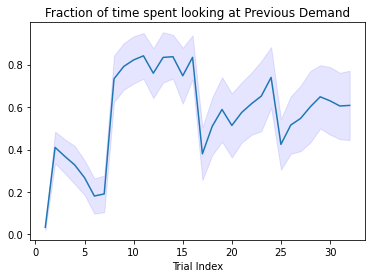

In [ ]:
x = np.arange(1, 33, 1) 
y = trial_average_MP[:, 0]
ci = 1.96*trial_sd[:, 0]/5
plt.plot(x,y) 
plt.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)
plt.xlabel('Trial Index')
plt.title('Fraction of time spent looking at Previous Demand')
plt.show()

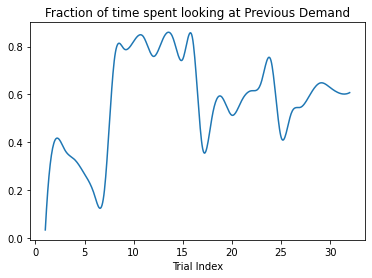

In [ ]:
x = np.arange(1, 33, 1) 
y = trial_average_MP[:, 0]
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_,Y_) 
plt.xlabel('Trial Index')
plt.title('Fraction of time spent looking at Previous Demand')
plt.show()

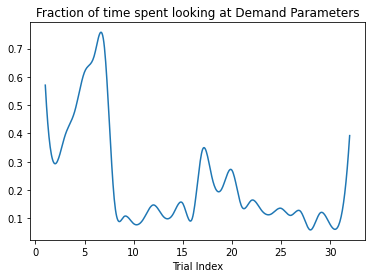

In [ ]:
x = np.arange(1, 33, 1) 
y = trial_average_MP[:, 1]
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_,Y_) 
plt.xlabel('Trial Index')
plt.title('Fraction of time spent looking at Demand Parameters')
plt.show()

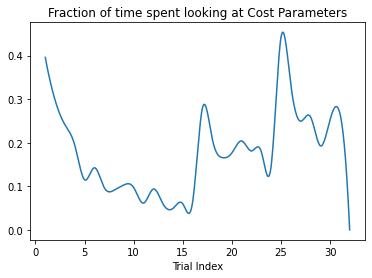

In [ ]:
x = np.arange(1, 33, 1) 
y = trial_average_MP[:, 2]
plt.xlabel('Trial Index')
plt.title('Fraction of time spent looking at Cost Parameters')
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_,Y_) 
plt.show()

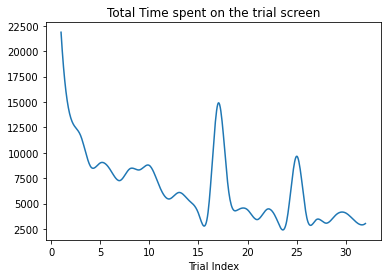

In [ ]:
x = np.arange(1, 33, 1) 
y = trial_average_MP[:, 3]
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_,Y_) 
plt.xlabel('Trial Index')
plt.title('Total Time spent on the trial screen')
plt.show()

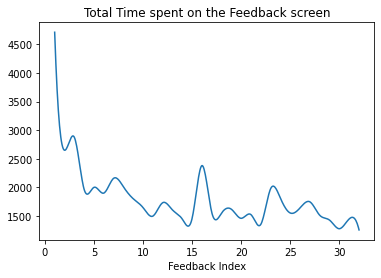

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback_average_MP
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_,Y_) 
plt.xlabel('Feedback Index')
plt.title('Total Time spent on the Feedback screen')
plt.show()

#Plots of both Combined

##Spline Plots

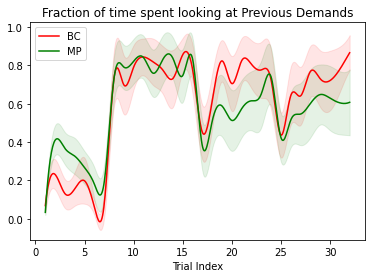

In [ ]:
x = np.arange(1, 33, 1) 
y = trial_average_BC[:, 0]
z = trial_average_MP[:, 0]
ci_BC_upper = trial_ci_upper_BC[:,0]
ci_BC_lower = trial_ci_lower_BC[:,0]
ci_MP_upper = trial_ci_upper_MP[:,0]
ci_MP_lower = trial_ci_lower_MP[:,0]
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
X_Z_Spline = make_interp_spline(x, z)
Z_ = X_Z_Spline(X_)
X_ci_BC_upper_Spline = make_interp_spline(x, ci_BC_upper)
ci_BC_upper_ = X_ci_BC_upper_Spline(X_)
X_ci_BC_lower_Spline = make_interp_spline(x, ci_BC_lower)
ci_BC_lower_= X_ci_BC_lower_Spline(X_)
X_ci_MP_upper_Spline = make_interp_spline(x, ci_MP_upper)
ci_MP_upper_ = X_ci_MP_upper_Spline(X_)
X_ci_MP_lower_Spline = make_interp_spline(x, ci_MP_lower)
ci_MP_lower_ = X_ci_MP_lower_Spline(X_)
plt.plot(X_, Y_, color='r', label='BC')
plt.plot(X_, Z_, color='g', label='MP')
plt.fill_between(X_, ci_BC_lower_, ci_BC_upper_, color='r', alpha=.1)
plt.fill_between(X_, ci_MP_lower_, ci_MP_upper_, color='g', alpha=.1)
plt.xlabel('Trial Index')
plt.title('Fraction of time spent looking at Previous Demands')
plt.legend()
plt.show()

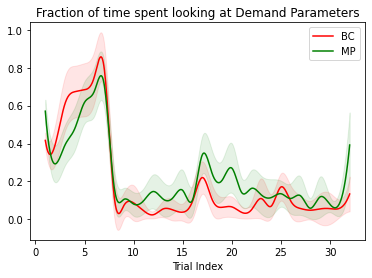

In [ ]:
x = np.arange(1, 33, 1) 
y = trial_average_BC[:, 1]
z = trial_average_MP[:, 1]
ci_BC_upper = trial_ci_upper_BC[:,1]
ci_BC_lower = trial_ci_lower_BC[:,1]
ci_MP_upper = trial_ci_upper_MP[:,1]
ci_MP_lower = trial_ci_lower_MP[:,1]
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
X_Z_Spline = make_interp_spline(x, z)
Z_ = X_Z_Spline(X_)
X_ci_BC_upper_Spline = make_interp_spline(x, ci_BC_upper)
ci_BC_upper_ = X_ci_BC_upper_Spline(X_)
X_ci_BC_lower_Spline = make_interp_spline(x, ci_BC_lower)
ci_BC_lower_= X_ci_BC_lower_Spline(X_)
X_ci_MP_upper_Spline = make_interp_spline(x, ci_MP_upper)
ci_MP_upper_ = X_ci_MP_upper_Spline(X_)
X_ci_MP_lower_Spline = make_interp_spline(x, ci_MP_lower)
ci_MP_lower_ = X_ci_MP_lower_Spline(X_)
plt.plot(X_, Y_, color='r', label='BC')
plt.plot(X_, Z_, color='g', label='MP')
plt.fill_between(X_, ci_BC_lower_, ci_BC_upper_, color='r', alpha=.1)
plt.fill_between(X_, ci_MP_lower_, ci_MP_upper_, color='g', alpha=.1)
plt.xlabel('Trial Index')
plt.title('Fraction of time spent looking at Demand Parameters')
plt.legend()
plt.show()

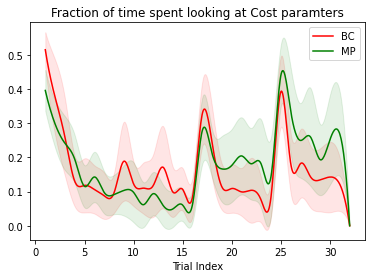

In [ ]:
x = np.arange(1, 33, 1) 
y = trial_average_BC[:, 2]
z = trial_average_MP[:, 2]
ci_BC_upper = trial_ci_upper_BC[:,2]
ci_BC_lower = trial_ci_lower_BC[:,2]
ci_MP_upper = trial_ci_upper_MP[:,2]
ci_MP_lower = trial_ci_lower_MP[:,2]
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
X_Z_Spline = make_interp_spline(x, z)
Z_ = X_Z_Spline(X_)
X_ci_BC_upper_Spline = make_interp_spline(x, ci_BC_upper)
ci_BC_upper_ = X_ci_BC_upper_Spline(X_)
X_ci_BC_lower_Spline = make_interp_spline(x, ci_BC_lower)
ci_BC_lower_= X_ci_BC_lower_Spline(X_)
X_ci_MP_upper_Spline = make_interp_spline(x, ci_MP_upper)
ci_MP_upper_ = X_ci_MP_upper_Spline(X_)
X_ci_MP_lower_Spline = make_interp_spline(x, ci_MP_lower)
ci_MP_lower_ = X_ci_MP_lower_Spline(X_)
plt.plot(X_, Y_, color='r', label='BC')
plt.plot(X_, Z_, color='g', label='MP')
plt.fill_between(X_, ci_BC_lower_, ci_BC_upper_, color='r', alpha=.1)
plt.fill_between(X_, ci_MP_lower_, ci_MP_upper_, color='g', alpha=.1)
plt.xlabel('Trial Index')
plt.title('Fraction of time spent looking at Cost paramters')
plt.legend()
plt.show()

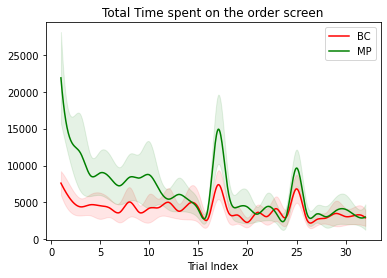

In [ ]:
x = np.arange(1, 33, 1) 
y = trial_average_BC[:, 3]
z = trial_average_MP[:, 3]
ci_BC_upper = trial_ci_upper_BC[:,3]
ci_BC_lower = trial_ci_lower_BC[:,3]
ci_MP_upper = trial_ci_upper_MP[:,3]
ci_MP_lower = trial_ci_lower_MP[:,3]
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
X_Z_Spline = make_interp_spline(x, z)
Z_ = X_Z_Spline(X_)
X_ci_BC_upper_Spline = make_interp_spline(x, ci_BC_upper)
ci_BC_upper_ = X_ci_BC_upper_Spline(X_)
X_ci_BC_lower_Spline = make_interp_spline(x, ci_BC_lower)
ci_BC_lower_= X_ci_BC_lower_Spline(X_)
X_ci_MP_upper_Spline = make_interp_spline(x, ci_MP_upper)
ci_MP_upper_ = X_ci_MP_upper_Spline(X_)
X_ci_MP_lower_Spline = make_interp_spline(x, ci_MP_lower)
ci_MP_lower_ = X_ci_MP_lower_Spline(X_)
plt.plot(X_, Y_, color='r', label='BC')
plt.plot(X_, Z_, color='g', label='MP')
plt.fill_between(X_, ci_BC_lower_, ci_BC_upper_, color='r', alpha=.1)
plt.fill_between(X_, ci_MP_lower_, ci_MP_upper_, color='g', alpha=.1)
plt.xlabel('Trial Index')
plt.title('Total Time spent on the order screen')
plt.legend()
plt.show()

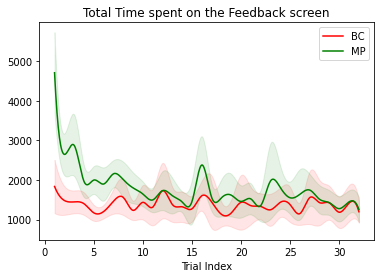

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback_average_BC
z = feedback_average_MP
ci_BC_upper = feedback_ci_upper_BC
ci_BC_lower = feedback_ci_lower_BC
ci_MP_upper = feedback_ci_upper_MP
ci_MP_lower = feedback_ci_lower_MP
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
X_Z_Spline = make_interp_spline(x, z)
Z_ = X_Z_Spline(X_)
X_ci_BC_upper_Spline = make_interp_spline(x, ci_BC_upper)
ci_BC_upper_ = X_ci_BC_upper_Spline(X_)
X_ci_BC_lower_Spline = make_interp_spline(x, ci_BC_lower)
ci_BC_lower_= X_ci_BC_lower_Spline(X_)
X_ci_MP_upper_Spline = make_interp_spline(x, ci_MP_upper)
ci_MP_upper_ = X_ci_MP_upper_Spline(X_)
X_ci_MP_lower_Spline = make_interp_spline(x, ci_MP_lower)
ci_MP_lower_ = X_ci_MP_lower_Spline(X_)
plt.plot(X_, Y_, color='r', label='BC')
plt.plot(X_, Z_, color='g', label='MP')
plt.fill_between(X_, ci_BC_lower_[:, 0], ci_BC_upper_[:, 0], color='r', alpha=.1)
plt.fill_between(X_, ci_MP_lower_[:, 0], ci_MP_upper_[:, 0], color='g', alpha=.1)
plt.xlabel('Trial Index')
plt.title('Total Time spent on the Feedback screen')
plt.legend()
plt.show()

##Line Plots

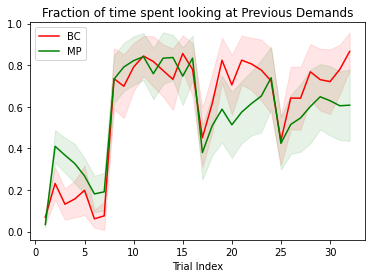

In [ ]:
x = np.arange(1, 33, 1) 
y = trial_average_BC[:, 0]
z = trial_average_MP[:, 0]
plt.plot(x, y, color='r', label='BC')
plt.plot(x, z, color='g', label='MP')
ci1 = 2.064*trial_sd_BC[:, 0]/5
ci2 = 2.064*trial_sd_MP[:, 0]/5
plt.fill_between(x, (y-ci1), (y+ci1), color='r', alpha=.1)
plt.fill_between(x, (z-ci2), (z+ci2), color='g', alpha=.1)
plt.xlabel('Trial Index')
plt.title('Fraction of time spent looking at Previous Demands')
plt.legend()
plt.show()

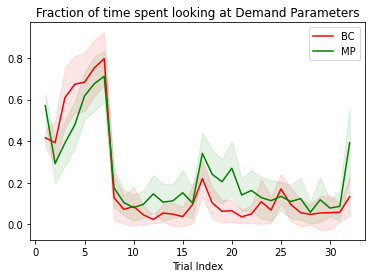

In [ ]:
x = np.arange(1, 33, 1) 
y = trial_average_BC[:, 1]
z = trial_average_MP[:, 1]
plt.plot(x, y, color='r', label='BC')
plt.plot(x, z, color='g', label='MP')
ci1 = 2.064*trial_sd_BC[:, 1]/5
ci2 = 2.064*trial_sd_MP[:, 1]/5
plt.fill_between(x, (y-ci1), (y+ci1), color='r', alpha=.1)
plt.fill_between(x, (z-ci2), (z+ci2), color='g', alpha=.1)
plt.xlabel('Trial Index')
plt.title('Fraction of time spent looking at Demand Parameters')
plt.legend()
plt.show()

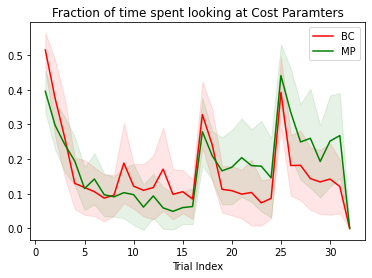

In [ ]:
x = np.arange(1, 33, 1) 
y = trial_average_BC[:, 2]
z = trial_average_MP[:, 2]
plt.plot(x, y, color='r', label='BC')
plt.plot(x, z, color='g', label='MP')
ci1 = 2.064*trial_sd_BC[:, 2]/5
ci2 = 2.064*trial_sd_MP[:, 2]/5
plt.fill_between(x, (y-ci1), (y+ci1), color='r', alpha=.1)
plt.fill_between(x, (z-ci2), (z+ci2), color='g', alpha=.1)
plt.xlabel('Trial Index')
plt.title('Fraction of time spent looking at Cost Paramters')
plt.legend()
plt.show()

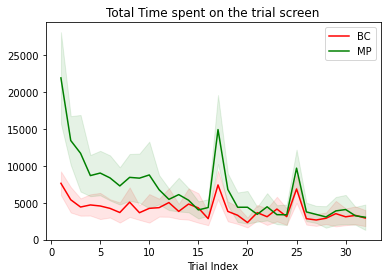

In [ ]:
x = np.arange(1, 33, 1) 
y = trial_average_BC[:, 3]
z = trial_average_MP[:, 3]
plt.plot(x, y, color='r', label='BC')
plt.plot(x, z, color='g', label='MP')
ci1 = 2.064*trial_sd_BC[:, 3]/5
ci2 = 2.064*trial_sd_MP[:, 3]/5
plt.fill_between(x, (y-ci1), (y+ci1), color='r', alpha=.1)
plt.fill_between(x, (z-ci2), (z+ci2), color='g', alpha=.1)
plt.xlabel('Trial Index')
plt.title('Total Time spent on the trial screen')
plt.legend()
plt.show()

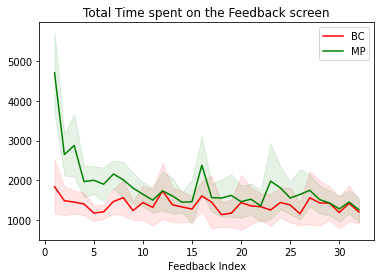

In [ ]:
x = np.arange(1, 33, 1) 
y = feedback_average_BC[:, 0]
z = feedback_average_MP[:, 0]
plt.plot(x, y, color='r', label='BC')
plt.plot(x, z, color='g', label='MP')
ci1 = 2.064*feedback_sd_BC[:, 0]/5
ci2 = 2.064*feedback_sd_MP[:, 0]/5
plt.fill_between(x, (y-ci1), (y+ci1), color='r', alpha=.1)
plt.fill_between(x, (z-ci2), (z+ci2), color='g', alpha=.1)
plt.xlabel('Feedback Index')
plt.title('Total Time spent on the Feedback screen')
plt.legend()
plt.show()

#Standard's -t-test

## To check if there is significant difference in time spent over all screens, between the two different experiments.

Null hypothesis: The mean of fraction of time spent on a specific interval on screens between two experiments is the same.

Alternate hypothesis: The mean between two experiments are not same.

Confidence Level = 95%.
Therefore, cutoff p value = 0.05.

If p value found is less than or equal to 0.05, then null hypothesis is rejected.

If p value found is more than 0.05, then we 'fail to reject' the null hypothesis.

Null hypothesis: The mean of fraction of time spent on previous demands on screens between two experiments is the same.

In [ ]:
tvalue, pvalue = stats.ttest_ind(trial_average_BC[:, 0],
                trial_average_MP[:, 0])
if pvalue <= 0.05:
    print("Null Hypothesis is rejected.")
else:
    print("We fail to reject the null hypothesis.")

We fail to reject the null hypothesis.


Null hypothesis: The mean of fraction of time spent on demand parameters on screens between two experiments is the same.

In [ ]:
tvalue, pvalue = stats.ttest_ind(trial_average_BC[:, 1],
                trial_average_MP[:, 1])
if pvalue <= 0.05:
    print("Null Hypothesis is rejected.")
else:
    print("We fail to reject the null hypothesis.")

We fail to reject the null hypothesis.


Null hypothesis: The mean of fraction of time spent on cost parameters on screens between two experiments is the same.

In [ ]:
tvalue, pvalue = stats.ttest_ind(trial_average_BC[:, 2],
                trial_average_MP[:, 2])
if pvalue <= 0.05:
    print("Null Hypothesis is rejected.")
else:
    print("We fail to reject the null hypothesis.")

We fail to reject the null hypothesis.


Null hypothesis: The mean of total time spent on  order screens between two experiments is the same.

In [ ]:
tvalue, pvalue = stats.ttest_ind(trial_average_BC[:, 3],
                trial_average_MP[:, 3])
if pvalue <= 0.05:
    print("Null Hypothesis is rejected.")
else:
    print("We fail to reject the null hypothesis.")

Null Hypothesis is rejected.


Null hypothesis: The mean of total time spent on feedback screens between two experiments is the same.

In [ ]:
tvalue, pvalue = stats.ttest_ind(feedback_average_BC[:, 0],
                feedback_average_MP[:, 2])
if pvalue <= 0.05:
    print("Null Hypothesis is rejected.")
else:
    print("We fail to reject the null hypothesis.")

IndexError: ignored

## To check if there is significant difference in time spent over all screens, between the two different experiments, after removing first 8 periods for learning about the experiment.

Null hypothesis: The mean of fraction of time spent on a specific interval on screens between two experiments is the same.

Alternate hypothesis: The mean between two experiments are not same.

Confidence Level = 95%.
Therefore, cutoff p value = 0.05.

If p value found is less than or equal to 0.05, then null hypothesis is rejected.

If p value found is more than 0.05, then we 'fail to reject' the null hypothesis.

Null hypothesis: The mean of fraction of time spent on previous demands on screens between two experiments is the same.

In [ ]:
tvalue, pvalue = stats.ttest_ind(trial_average_BC[8:, 0],
                trial_average_MP[8:, 0])
if pvalue <= 0.05:
    print("Null Hypothesis is rejected.")
else:
    print("We fail to reject the null hypothesis.")

Null hypothesis: The mean of fraction of time spent on demand parameters on screens between two experiments is the same.

In [ ]:
tvalue, pvalue = stats.ttest_ind(trial_average_BC[8:, 1],
                trial_average_MP[8:, 1])
if pvalue <= 0.05:
    print("Null Hypothesis is rejected.")
else:
    print("We fail to reject the null hypothesis.")

Null hypothesis: The mean of fraction of time spent on cost parameters on screens between two experiments is the same.

In [ ]:
tvalue, pvalue = stats.ttest_ind(trial_average_BC[8:, 2],
                trial_average_MP[8:, 2])
if pvalue <= 0.05:
    print("Null Hypothesis is rejected.")
else:
    print("We fail to reject the null hypothesis.")

Null hypothesis: The mean of total time spent on  order screens between two experiments is the same.

In [ ]:
tvalue, pvalue = stats.ttest_ind(trial_average_BC[8:, 3],
                trial_average_MP[8:, 3])
if pvalue <= 0.05:
    print("Null Hypothesis is rejected.")
else:
    print("We fail to reject the null hypothesis.")

Null hypothesis: The mean of total time spent on feedback screens between two experiments is the same.

In [ ]:
tvalue, pvalue = stats.ttest_ind(feedback_average_BC[8:, 0],
                feedback_average_MP[8:, 0])
if pvalue <= 0.05:
    print("Null Hypothesis is rejected.")
else:
    print("We fail to reject the null hypothesis.")

**Conclusion**:

First 2 Null hypotheses are **rejected**

We **'fail to reject'** all of the other three hypothesis.

Therefore, there is significant statistical difference in the fraction of time spent on previous demand and demand parameters between two experiment after removing a learning period of 8 periods/products.

But, there is **not** enough significant statistical difference in the fraction of time spent on cost paramters and total time spent on the order screens and feedback screens between two experiment after removing a learning period of 8 periods/products to reject these hypotheses.


## To check if there is significant difference in time spent over 1 specific screens by participants, between the two different experiments.

In [ ]:
i =  0
j = 0
dof = 25 + 25 - 2 #dof = 48
nullh = np.zeros((32,4))
cutoff_tvalue = 2.010635
for i in range(32):
    for j in range(4):
        if j == 0:
            print("Null hypothesis : The fraction of time spent looking on previous demand on order screen "+ str(i+1) + " between the two experiment is the same.")
        elif j == 1:
            print("Null hypothesis : The fraction of time spent looking on demand parameters on order screen "+ str(i+1) + " between the two experiment is the same.")
        elif j == 2:
            print("Null hypothesis : The fraction of time spent looking on cost parameters on order screen "+ str(i+1) + " between the two experiment is the same.")
        elif j == 3:
            print("Null hypothesis : The total spent on order screen "+ str(i+1) + " between the two experiment is the same.")
        tvalue = abs(trial_average_BC[i][j] - trial_average_MP[i][j])/math.sqrt((trial_sd_BC[i][j]**2/25) + (trial_sd_MP[i][j]**2/25))
        if tvalue <= cutoff_tvalue:
            print("Null Hypothesis is rejected.")
            nullh[i][j] = 1
        else:
            print("We fail to reject the null hypothesis.")
            nullh[i][j] = 0

In [ ]:
nullh #0 means fail to reject, 1 means rejected